In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from local.torch_basics import *
from local.test import *
from local.basics import *
from local.data.all import *
from local.vision.core import *
from local.notebook.showdoc import show_doc
from local.audio.core import *
from local.audio.augment import *
from local.vision.learner import *
from local.vision.models.xresnet import *
from local.metrics import *

In [ ]:
p = Config()['data_path'] / 'ST-AEDS-20180100_1-OS'
x = AudioGetter("", recurse=True, folders=None)
files = x(p)
original_aud = AudioItem.create(files[0])

In [ ]:
a2s = AudioToSpec(n_fft = 1024, hop_length=256)

In [ ]:
original_spec = a2s(original_aud)

In [ ]:
type(original_spec[0])

torch.Tensor

AudioSpectrogram
SG tensor([[[-51.0104, -50.9824, -49.6577,  ..., -51.3078, -49.7318, -51.2239],
         [-47.5339, -46.6885, -46.5545,  ..., -49.6067, -48.8988, -50.0801],
         [-44.0041, -44.7521, -46.3973,  ..., -44.6014, -47.3424, -48.0787],
         ...,
         [-34.6224, -33.4677, -41.2308,  ..., -30.0123, -31.0344, -31.6413],
         [-37.9430, -37.0625, -41.8115,  ..., -37.1241, -41.2960, -37.6601],
         [-30.9533, -37.0937, -38.9977,  ..., -39.3398, -38.0950, -36.2591]]])


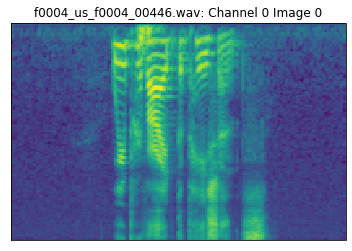

In [ ]:
original_spec.show()

In [ ]:
original_spec.n_fft

1024

# End-to-End Example

AudioSpectrogram
SG tensor([[[ -78.1900, -100.0000,  -93.9380,  ...,  -72.6859,  -76.2773,
           -84.7785],
         [ -78.4325, -100.0000,  -93.4616,  ...,  -70.2102,  -74.4771,
           -81.9278],
         [ -78.5757, -100.0000,  -86.4646,  ...,  -72.5238,  -76.8216,
           -79.1350],
         ...,
         [ -27.2220,  -22.4422,  -22.3554,  ...,  -26.0922,  -25.2414,
           -37.7836],
         [ -27.0627,  -23.3148,  -23.4286,  ...,  -30.7994,  -30.2863,
           -46.0939],
         [ -27.9215,  -34.4187,  -39.2900,  ...,  -37.6736,  -34.4262,
           -37.4454]]])


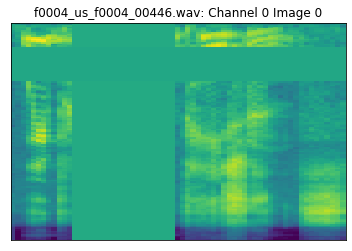

AudioSpectrogram
SG tensor([[[ -69.3498, -100.0000, -100.0000,  ...,  -92.6545,  -97.4976,
           -63.5844],
         [ -69.4984, -100.0000, -100.0000,  ...,  -96.2793,  -98.7215,
           -63.5869],
         [ -69.5532, -100.0000, -100.0000,  ...,  -96.2884,  -96.5353,
           -63.5707],
         ...,
         [ -28.1960,  -32.4768,  -29.3106,  ...,  -26.4900,  -16.6108,
           -16.5160],
         [ -25.9050,  -31.5048,  -28.8571,  ...,  -25.1923,  -30.6556,
           -22.8679],
         [ -34.7765,  -40.3203,  -33.3438,  ...,  -31.0255,  -32.1305,
           -24.3048]]])


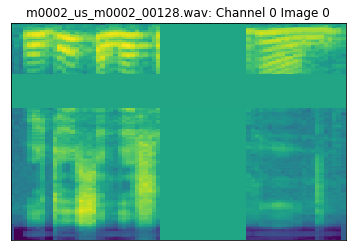

In [ ]:
items = get_audio_files(p)
oa = OpenAudio(items)
preprocesses = [oa, RemoveSilence("trim"), Resample(22050),]
augments = [AudioToSpec(n_fft=1048), MaskTime(), MaskFreq()]
functions = preprocesses + augments
pipe = Pipeline(functions, as_item=True)
for i in range(2): pipe.show(pipe(i))

AudioSpectrogram
SG tensor([[[-75.2650, -76.6268, -81.1412,  ..., -73.1595, -76.0715, -78.0031],
         [-75.5167, -76.8849, -81.4170,  ..., -70.8922, -74.2820, -76.7418],
         [-75.6558, -77.0185, -81.2398,  ..., -71.1205, -72.3665, -73.9274],
         ...,
         [-23.9384, -20.8025, -17.8975,  ..., -23.4229, -28.6654, -34.8437],
         [-19.2974, -18.6525, -17.5769,  ..., -30.0528, -33.9930, -41.8303],
         [-22.9099, -23.9080, -26.5586,  ..., -33.5007, -34.0653, -33.2631]]])


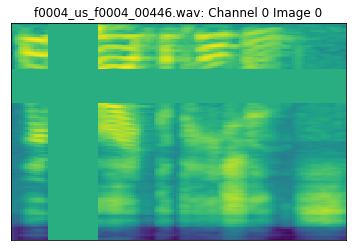

AudioSpectrogram
SG tensor([[[-66.4424, -67.8171, -72.4572,  ..., -66.4662, -59.5839, -56.7785],
         [-66.5875, -67.9620, -72.6006,  ..., -66.4702, -59.5837, -56.7777],
         [-66.6389, -68.0135, -72.6527,  ..., -66.4475, -59.5635, -56.7576],
         ...,
         [-21.0870, -21.7919, -23.7131,  ..., -17.7189, -14.7431, -12.4295],
         [-21.6572, -22.4290, -23.9807,  ..., -21.1565, -17.5402, -15.1792],
         [-30.9178, -30.9492, -32.2747,  ..., -27.2769, -20.1383, -17.1892]]])


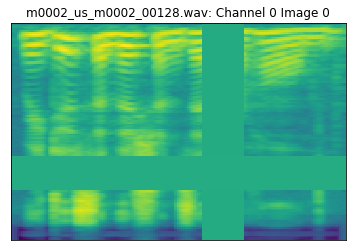

In [ ]:
items = get_audio_files(p)
oa = OpenAudio(items)
preprocesses = L(oa, RemoveSilence("trim"), Resample(22050), AudioToSpec(n_fft=2048, hop_length=256))
augments = L(MaskTime(), MaskFreq())
functions = preprocesses + augments
pipe = Pipeline(functions, as_item=True)
for i in range(2): pipe.show(pipe(i))

In [ ]:
# labeler = lambda x: str(x).split('/')[-1][:5]
# tfms = [[AudioItem.create, Resample(8000)], [labeler]]
# items = get_audio_files(p)

# tfds = TfmdDS(items, tfms)
# tfds.show(tfds[0])
# bs = 8
# tfdl = TfmdDL(tfds, bs=bs, after_item=[AudioToSpec(hop_length=256), CropTime(1000), MaskTime(), MaskFreq()])
# t = tfdl.one_batch()
# print(len(t[0]), "tensors with shapes", [ten.shape for ten in t[0]])
# print("labels", t[1])

## Datablock and Basic End to End Training

In [ ]:
def AudioBlock(cls=AudioItem): return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)

In [ ]:
auds = DataBlock(blocks=(AudioBlock, CategoryBlock),  
                 get_items=get_audio_files, 
                 splitter=RandomSplitter(),
                 get_y=lambda x: str(x).split('/')[-1][:5])

In [ ]:
cats = [y for _,y in auds.datasource(p)]

In [ ]:
#verify categories are being correctly assigned
test_eq(min(cats).item(), 0)
test_eq(max(cats).item(), 9)

In [ ]:
p = Path('/home/jupyter/.fastai/data/ST-AEDS-20180100_1-OS')
a2s = AudioToSpec()
crop_2000ms = CropTime(2000)
tfms = Pipeline([a2s, crop_2000ms], as_item=True)
dbunch_cropspec = auds.databunch(p, item_tfms=tfms, bs=64)

<div class = "alert alert-block alert-warning"><strong>Broken:</strong><br>Show batch is broken as it appears to just be grabbing the data from the sg, and not the sg object itself, but calls the sg's show method which relies on nchannels, which is an object of AudioSpectrogram (part of sg settings but we overrode getattr to make it work like an attribute). This means the items cant show themselves for the batch, but training still works </div>


In [ ]:
dbunch_cropspec.show_batch(max_n=9)

AudioSpectrogram
SG tensor([[[-20.5674,   2.2625,   3.5912,  ..., -52.9734, -48.8199, -50.9892],
         [-24.1702,   2.6231,   5.6379,  ..., -48.5503, -48.7916, -49.3033],
         [-29.8014,   5.3111,   1.6588,  ..., -45.2282, -48.6182, -46.3981],
         ...,
         [-31.2239, -46.9571, -30.4565,  ..., -40.5923, -39.6688, -38.4218],
         [-33.8436, -43.3404, -34.6278,  ..., -42.7528, -42.5758, -41.4494],
         [-37.2272, -39.3608, -38.6519,  ..., -37.6379, -38.4932, -37.2396]]])


AttributeError: AudioSpectrogram object has no attribute nchannels

In [ ]:
dbunch_cropspec.one_batch()[0].shape

torch.Size([64, 1, 128, 63])

In [ ]:
# credit to Kevin Bird and Hiromi Suenaga for these two lines to adjust a CNN model to take 1 channel input
def alter_learner(learn):
    learn.model[0][0].in_channels=1
    learn.model[0][0].weight = torch.nn.parameter.Parameter(learn.model[0][0].weight[:,1,:,:].unsqueeze(1))

In [ ]:
learn = Learner(dbunch_cropspec, 
                xresnet18(),
                torch.nn.CrossEntropyLoss(), 
                metrics=[accuracy])
alter_learner(learn)

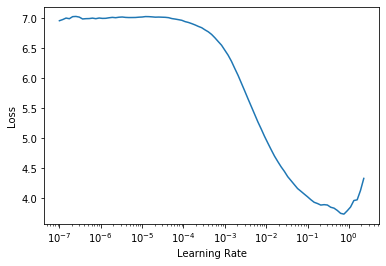

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,1.044195,31.533587,0.260417,00:05
1,0.740763,33.708569,0.248698,00:05
2,0.580721,0.748532,0.778646,00:05
3,0.488658,1.766125,0.587240,00:05
4,0.332290,0.368559,0.923177,00:05
5,0.234016,0.199998,0.944010,00:05
6,0.154467,0.100395,0.966146,00:05
7,0.093547,0.036592,0.993490,00:05
8,0.062485,0.047728,0.989583,00:05
9,0.039793,0.043312,0.989583,00:05


## Cropping signal instead of Spectrogram so that we can move on to GPU transforms

In [ ]:
auds = DataBlock(blocks=(AudioBlock, CategoryBlock),  
                 get_items=get_audio_files, 
                 splitter=RandomSplitter(),
                 get_y=lambda x: str(x).split('/')[-1][:5])

In [ ]:
auds.datasource(p)[0]

In [ ]:
p = Path('/home/jupyter/.fastai/data/ST-AEDS-20180100_1-OS')
cropsig_2000ms = CropSignal(2000)
ds_tfms = Pipeline([cropsig_2000ms, a2s], as_item=True)
dl_tfms = Pipeline([], as_item=True)
dbunch_cropsig = auds.databunch(p, item_tfms=ds_tfms, bs=64)
dbunch_cropsig.show_batch(max_n=9)

In [ ]:
dbunch_cropsig.one_batch()[0].shape

In [ ]:
learn = Learner(dbunch_cropsig,
                xresnet18(),  
                torch.nn.CrossEntropyLoss(), 
                metrics=[accuracy])
alter_learner(learn)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=2e-1)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

## Non GPU Transform for Speed Baseline

In [ ]:
p = Path('/home/jupyter/.fastai/data/ST-AEDS-20180100_1-OS')
cropsig_2000ms = CropSignal(2000)
a2s_baseline = AudioToSpec(n_fft=2048, hop_length=256, n_mels=128)
ds_tfms = Pipeline([cropsig_2000ms, a2s_baseline, MaskFreq()], as_item=True)
dbunch_cropsig = auds.databunch(p, item_tfms=ds_tfms, bs=64)
dbunch_cropsig.show_batch(max_n=9)

In [ ]:
dbunch_cropsig.one_batch()[0].shape

In [ ]:
learn = Learner(dbunch_cropsig,
                xresnet18(),  
                torch.nn.CrossEntropyLoss(), 
                metrics=[accuracy])
alter_learner(learn)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=2e-1)

## Attempted GPU Transform

In [ ]:
def MaskFreqBatch(num_masks=1, size=20, start=None, val=None, **kwargs):
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    def _inner(spectro:AudioSpectrogram)->AudioSpectrogram:
        '''Google SpecAugment time masking from https://arxiv.org/abs/1904.08779.'''
        start_ = start
        sg = spectro.clone()
        channel_mean = sg.contiguous().view(sg.size(0), -1).mean(-1)[:,None,None]
        mask_val = channel_mean if val is None else val
        c, y, x = sg.shape[-3:]
        for _ in range(num_masks):
            #print("Mask Val", mask_val)
            #Currently not worrying about getting the channel mean from batchwise implementation
            mask = torch.ones(size, x, device=device).unsqueeze(0).unsqueeze(0) #* mask_val    
            if start_ is None: start_= random.randint(0, y-size)
            if not 0 <= start_ <= y-size:
                raise ValueError(f"Start value '{start_}' out of range for AudioSpectrogram of shape {sg.shape}")
            sg[...,start_:start_+size,:] = mask
            start_ = None
        return AudioSpectrogram.create(sg, settings=spectro.settings)
    return _inner

In [ ]:
p = Path('/home/jupyter/.fastai/data/ST-AEDS-20180100_1-OS')
cropsig_2000ms = CropSignal(2000)

In [ ]:
def SGRollBatch(max_shift_pct=0.5, direction=0, **kwargs):
    '''Shifts spectrogram along x-axis wrapping around to other side'''
    if int(direction) not in [-1, 0, 1]: 
        raise ValueError("Direction must be -1(left) 0(bidirectional) or 1(right)")
    def _inner(spectro:AudioSpectrogram)->AudioSpectrogram:
        nonlocal direction
        direction = random.choice([-1, 1]) if direction == 0 else direction
        sg = spectro.clone()
        c, height, width = sg.shape[-3:]
        roll_by = int(width*random.random()*max_shift_pct*direction)
        sg = sg.roll(roll_by, dims=-1)
        return AudioSpectrogram.create(sg, settings=spectro.settings)
    return _inner

In [ ]:
ds_tfms = Pipeline([cropsig_2000ms, a2s_baseline], as_item=True)
dl_tfms = Pipeline([Cuda(), MaskFreqBatch(), SGRollBatch()], as_item=True)
dbunch = auds.databunch(p, item_tfms=ds_tfms, batch_tfms=dl_tfms, bs=64)
dbunch.show_batch(max_n=9)

In [ ]:
dbunch.one_batch()[0].shape

In [ ]:
learn = Learner(dbunch,
                xresnet18(),  
                torch.nn.CrossEntropyLoss(), 
                metrics=[accuracy])
alter_learner(learn)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=2e-2)

## 2nd Attempt with correct mean channel values

In [ ]:
def MaskFreqBatchValue(num_masks=1, size=20, start=None, val=None, **kwargs):
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    def _inner(spectro:AudioSpectrogram)->AudioSpectrogram:
        '''Google SpecAugment time masking from https://arxiv.org/abs/1904.08779.'''
        start_ = start
        sg = spectro.clone()
        channel_mean = sg.contiguous().view(sg.size(0), -1).mean(-1)[:,None,None,None]
        mask_val = channel_mean if val is None else val
        b, c, y, x = sg.shape
        for _ in range(num_masks):
            ones_mask = torch.ones(size=(1, c, size, x), device=device)
            mask = ones_mask * mask_val
            if start_ is None: start_= random.randint(0, y-size)
            if not 0 <= start_ <= y-size:
                raise ValueError(f"Start value '{start_}' out of range for AudioSpectrogram of shape {sg.shape}")
            sg[:,:,start_:start_+size,:] = mask
            start_ = None
        return AudioSpectrogram.create(sg, settings=spectro.settings)
    return _inner

In [ ]:
(torch.ones(size=(64,1,20,128)) * 12).shape

In [ ]:
ds_tfms = Pipeline([cropsig_2000ms, a2s_baseline], as_item=True)
dl_tfms = Pipeline([Cuda(), MaskFreqBatchValue()], as_item=True)
dbunch = auds.databunch(p, item_tfms=ds_tfms, batch_tfms=dl_tfms, bs=64)
dbunch.show_batch(max_n=9)

## 3rd Attempt with correct random placement of mask

In [ ]:
def MaskFreqBatchPlace(num_masks=1, size=20, start=None, val=None, **kwargs):
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    def _inner(spectro:AudioSpectrogram)->AudioSpectrogram:
        '''Google SpecAugment time masking from https://arxiv.org/abs/1904.08779.'''
        start_ = start
        sg = spectro.clone()
        channel_mean = sg.contiguous().view(sg.size(0), -1).mean(-1)[:,None,None,None]
        mask_val = channel_mean if val is None else val
        b, c, y, x = sg.shape
        for _ in range(num_masks):
            ones_mask = torch.ones(size=(1, c, size, x), device=device)
            mask = ones_mask * mask_val
            if start_ is None: start_= random.randint(0, y-size)
            if not 0 <= start_ <= y-size:
                raise ValueError(f"Start value '{start_}' out of range for AudioSpectrogram of shape {sg.shape}")
            start_test = np.arange(0,,1)
            #print("Index: shape", start_test.shape)
            sg[:,:,start_:start_+size,:] = mask
            start_ = None
        return AudioSpectrogram.create(sg, settings=spectro.settings)
    return _inner

In [ ]:
ds_tfms = Pipeline([cropsig_2000ms, a2s_baseline], as_item=True)
dl_tfms = Pipeline([Cuda(), MaskFreqBatchPlace()], as_item=True)
dbunch = auds.databunch(p, item_tfms=ds_tfms, batch_tfms=dl_tfms, bs=4)
dbunch.show_batch(max_n=9)

In [ ]:
(torch.ones(size=(64,1,20,128)) * 12).shape

In [ ]:
fake_batch = torch.stack([CropTime(2000)(a2s(AudioItem.create(files[i]))) for i in range(64)])

In [ ]:
fake_batch.shape

In [ ]:
index = np.array([2,4,6,8], dtype=np.intp)

In [ ]:
index + 20

In [ ]:
fake_batch[:,:,index:index+20,:]

In [ ]:
fake_batch[:,:,torch.arange(0, 7).long(),:].shape